In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
print("Setup Complete")


Setup Complete


In [4]:
file_path='../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data=pd.read_csv(file_path)

In [5]:
print(f"Data Loaded sucessfully with {data.shape[0]} rows and {data.shape[1]} columns.")

Data Loaded sucessfully with 7043 rows and 21 columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
total_charges_numeric = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [10]:
# Now, let's see how many NaNs (missing values) this created
print(f"Original 'TotalCharges' object non-nulls: {data['TotalCharges'].notnull().sum()}")
print(f"New 'total_charges_numeric' non-nulls:  {total_charges_numeric.notnull().sum()}")
print(f"Number of new NaNs created: {total_charges_numeric.isnull().sum()}")

Original 'TotalCharges' object non-nulls: 7043
New 'total_charges_numeric' non-nulls:  7032
Number of new NaNs created: 11


In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data_clean=data.dropna(subset=["TotalCharges"])
data_clean=data_clean.drop(['customerID'], axis=1)

print(f"Original data shape:{data.shape}")
print(f"Cleaned data shape:{data_clean.shape}")
data_clean.info()

Original data shape:(7043, 21)
Cleaned data shape:(7032, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null  

In [14]:
data_clean["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [16]:
churn_rate=data_clean["Churn"].value_counts(normalize=True)*100
print(churn_rate)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Churn Distribution ( Yes or NO)')

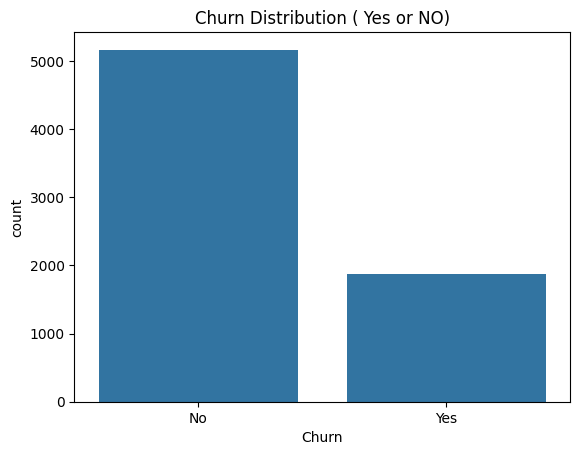

In [18]:
sns.countplot(x='Churn',data=data_clean)
plt.title("Churn Distribution ( Yes or NO)")

In [20]:
# We've already cleaned 'TotalCharges' and 'Churn'
# 'df_clean' has 7032 rows and 20 columns

# Let's list all the *object* (text) columns
# These are our potential categorical features
categorical_features = data_clean.select_dtypes(include=['object']).columns
print("Categorical Features:")
print(categorical_features)

print("\n" + "="*30 + "\n")

# Let's list all the *number* columns
# These are our numerical features
numerical_features = data_clean.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:")
print(numerical_features)

Categorical Features:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Numerical Features:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


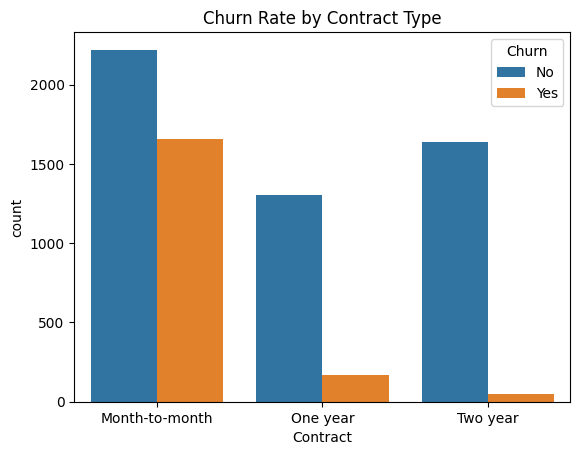

In [22]:
# Check how 'Contract' type affects Churn
sns.countplot(data=data_clean, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

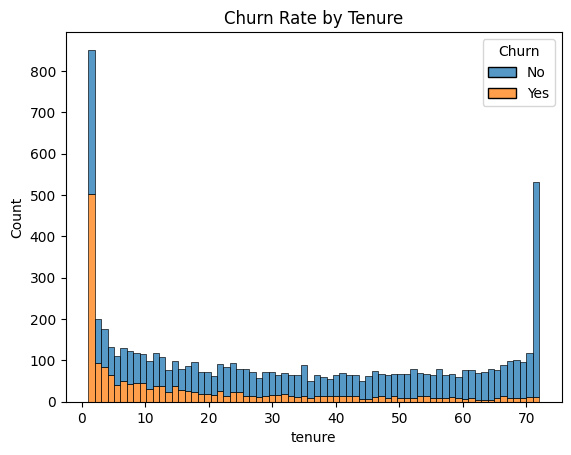

In [29]:
# Check how 'tenure' (months as customer) affects Churn
sns.histplot(data=data_clean, x='tenure', hue='Churn', multiple='stack', bins=70)
plt.title('Churn Rate by Tenure')
plt.show()

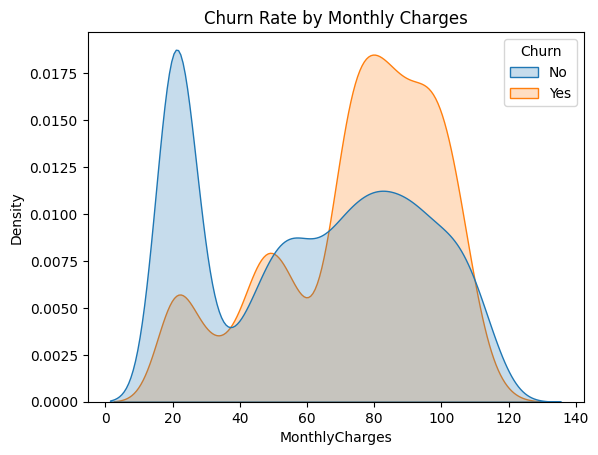

In [30]:
# Check how 'MonthlyCharges' affects Churn
sns.kdeplot(data=data_clean, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Churn Rate by Monthly Charges')
plt.show()